# Exploratory Data Analysis

## The goal of this EDA is to gain a better understanding of the data set.

We will start by importing the packages we will need to complete this analysis.

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set(style="whitegrid", color_codes=True)
%matplotlib inline

Next, we will read in all of the excel files that we have available.  These excel files were created by Tim Sevenhuysen, who runs a LCS statisics blog.

Source: http://oracleselixir.com/match-data/

In addition, I added an additional column, denoting which data set each row came from.  As these are also in chronological order, these will allow us to compare the seperate seasons against one another.

In [4]:
spring_17 = pd.read_excel('./data/2017spring-match-data.xlsx', sheetname="Sheet1")
MSI_17 = pd.read_excel('./data/2017-MSI-match-data-OraclesElixir-2017-05-21.xlsx', sheetname = "Sheet1")
summer_17 = pd.read_excel('./data/2017-summer-match-data-OraclesElixir-2017-07-05.xlsx', sheetname = "Sheet1")
MSI_16 = pd.read_excel('./data/MSI-2016-match-data-v1-OraclesElixir.xlsx', sheetname="data")
spring_16 = pd.read_excel('./data/NA-EU-LCK-LMS-2016-spring-match-data-v1-OraclesElixir.xlsx', sheetname="data")
summer_16 = pd.read_excel('./data/NA-EU-LCK-LMS-2016-summer-match-data-v1.1-OraclesElixir.xlsx', sheetname="Sheet1")
worlds_16 = pd.read_excel('./data/NA-EU-LCK-LMS-2016-regionals-and-Worlds-match-data-v1-OraclesElixir.xlsx', sheetname="data")
spring_16['Data Set'] = 1
MSI_16['Data Set'] = 2
summer_16['Data Set'] = 3
worlds_16['Data Set'] = 4
spring_17['Data Set'] = 5
MSI_17['Data Set'] = 6
summer_17['Data Set'] = 7

Then, we will create three new Dataframes for analysis: LCS, player_data, team_data

LCS contains all of the data from all 7 data sets.
player_data contains only the data from players.
team_data  contains only the data pertaining to the teams.

In [5]:
LCS = pd.DataFrame()
LCS = LCS.append(spring_16)
LCS = LCS.append(MSI_16)
LCS = LCS.append(summer_16)
LCS = LCS.append(worlds_16)
LCS = LCS.append(spring_17)
LCS = LCS.append(MSI_17)
LCS = LCS.append(summer_17)
player_data = LCS[~LCS['position'].isin(["Team"])]
team_data = LCS[LCS['position'].isin(["Team"])]
player_data = player_data[player_data['league'] != "LPL"]
player_data = player_data.reset_index(drop=True)

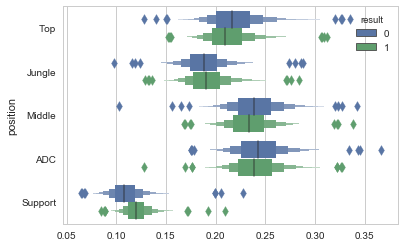

In [6]:
sns.lvplot(x=player_data['earnedgoldshare'].values.astype(np.float64), y=player_data['position'], hue=player_data['result'])

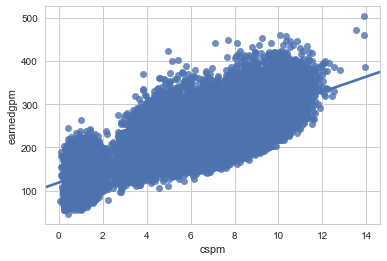

In [7]:
sns.regplot(x=player_data['cspm'], y=player_data['earnedgpm'], scatter=True)

In [8]:
fbdata = player_data.loc[(player_data['fb']==1) | (player_data['fbvictim']==1)]
fbdata = fbdata[['gameid','position', 'fb', 'fbvictim', 'result']]
fbdata['fb'].loc[(fbdata['position'] == "Top") & (fbdata['fb'] == 1)] = "Top"
fbdata['fb'].loc[(fbdata['position'] == "Jungle") & (fbdata['fb'] == 1)] = "Jungle"
fbdata['fb'].loc[(fbdata['position'] == "Middle") & (fbdata['fb'] == 1)] = "Middle"
fbdata['fb'].loc[(fbdata['position'] == "ADC") & (fbdata['fb'] == 1)] = "ADC"
fbdata['fb'].loc[(fbdata['position'] == "Support") & (fbdata['fb'] == 1)] = "Support"
fbdata['fbvictim'].loc[(fbdata['position'] == "Top") & (fbdata['fbvictim'] == 1)] = "Top"
fbdata['fbvictim'].loc[(fbdata['position'] == "Jungle") & (fbdata['fbvictim'] == 1)] = "Jungle"
fbdata['fbvictim'].loc[(fbdata['position'] == "Middle") & (fbdata['fbvictim'] == 1)] = "Middle"
fbdata['fbvictim'].loc[(fbdata['position'] == "ADC") & (fbdata['fbvictim'] == 1)] = "ADC"
fbdata['fbvictim'].loc[(fbdata['position'] == "Support") & (fbdata['fbvictim'] == 1)] = "Support"
fbtest = fbdata[['gameid', 'fb', 'fbvictim','result']]
fbtest['fb'].loc[fbdata['fb'] == 0] = np.NaN
fbtest['fbvictim'].loc[fbdata['fbvictim'] == 0] = np.NaN
fbtest['result'].loc[(fbtest['fb'].notnull()) & (fbtest['result']) == 1] = "Win"
fbtest['result'].loc[(fbtest['fbvictim'].notnull()) & (fbtest['result']) == 1] = "Loss"
fbtest['result'].loc[fbdata['result'] == 0] = np.NaN
result = fbtest.groupby('gameid').first()

C:\Users\Patrickjosephgrady\Anaconda3\lib\site-packages\pandas\core\indexing.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
C:\Users\Patrickjosephgrady\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Patrickjosephgrady\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
C:\Users\Patrickjose

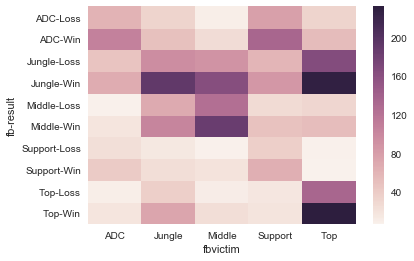

In [9]:
cross_table = pd.crosstab(index=[result['fb'],result['result']], columns=result['fbvictim'])
sns.heatmap(cross_table)

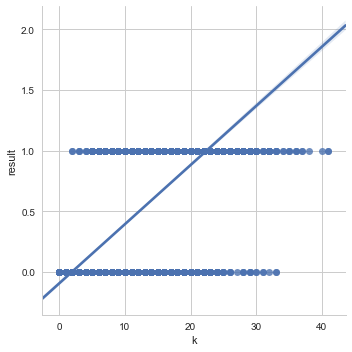

In [10]:
sns.lmplot('k', 'result', fit_reg=True, data=team_data)

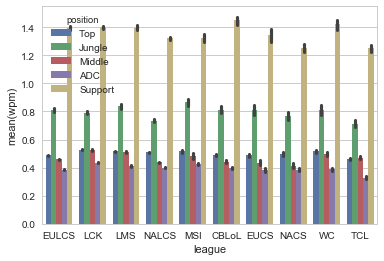

In [11]:
sns.barplot(x='league', y='wpm', hue='position', data=player_data)

In [12]:
player_data['gold_sign10'] = np.sign(player_data.gdat10)
player_data['gold_sign15'] = np.sign(player_data.gdat15)
player_data['gold_sign10']
player_data['gold_sign15']
player_data.groupby(['result', 'gold_sign15']).gold_sign10.value_counts().unstack()

gold_sign10           -1.0   0.0     1.0
result gold_sign15                      
0      -1.0         8426.0  13.0  2280.0
        0.0            7.0   NaN     4.0
        1.0         1429.0  11.0  4425.0
1      -1.0         4425.0  11.0  1429.0
        0.0            4.0   NaN     7.0
        1.0         2280.0  13.0  8426.0

## Having made these plots
### What are some insights you get from them?

I found the boxplot very interesting.  Normally, in League of Legends, there are two positions who should gain the most gold on a team, ADC and Mid.  This is because these two are the carries on a team, and often output the most damage on their teams.  However when you look at the boxplot, when you compare the winning teams and losing teams, we find the ADC and Mid have a lower percentage of the gold, and the Support and Jungle postions have a high percentage.

### Do you see any correlations?



### Is there a hypothesis you would like to investigate further?

I would like to investigate the interesting dynamics around a team's shared performance and see if this difference is statistically significant.  In addition, I'd also like to know whether this difference applies to more of the statistics.

### What other questions do they lead you to ask?

Which team would perform better, a team with 5 average players or a team with 1 star-player and 4 below-average players? 


## By you’ve asked a bunch of questions, and found some neat insights.

### Is there an interesting narrative, a way of presenting the insights using text and plots from the above, that tells a compelling story?

Yes, I think there is an interesting narrative relating to the worth of both individual skill and collaborative effort.  As we can see, the winning team often has a more even gold spread.  In League of Legends, gold allows a player to increase their character's stats in various ways that give them an advantage against their opponents.  As such, it is generally considered best if the player's who can gain the most advantage from the gold recieve the most, these being the ADC and Mid positions.  However, this is not the case, as the ADC and Mid players have less gold share on winning teams.  This may be because having a single player with the majority of gold on a team creates a major weakness, as if that player is killed, the team's ability to win a fight singificantly decreases.

### As you work out this story, what are some other trends/relationships you think will make it more complete?

I think looking at which positions are the best to "invest" in, especially in the early game could provide valuable and interesting insights into whether a team is better off trying to pool their power into a single player or spreading it out among multiple players.